# HW 1-10: Methods of Integration

This task evaluates the accuracy of three numerical methods—Euler’s method, the Midpoint method, and the Runge-Kutta method—for solving the differential equation  $\frac{dx}{dt} = x$  with the initial condition  $x(0) = 1$  over the interval  $t \in [0, 1]$. 

The analytical solution to this equation is  $x(t) = e^t$ , and at  $t = 1$ , the exact solution is  $e$ .

The implementation does the following:

1. **Define the ODE**: The derivative function $ \frac{dx}{dt} = x $.
2. **Define Numerical Methods**:
   - **Euler's Method**: A basic explicit first-order method.
   - **Midpoint Method**: A second-order Runge-Kutta method.
   - **Runge-Kutta Method**: A fourth-order method.
3. **Discretization**: Use step sizes corresponding to $ N = 2^{10}$ to $ N = 2^{20}$, where $N$ represents the number of discretization points.
4. **Error Analysis**: Compare numerical results with the exact solution to compute:
   - Absolute errors.
   - Percentage errors.

In [21]:
import numpy as np
import pandas as pd

# Numerical Integration Techniques
def euler_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        current += step_size * deriv_func(current_time, current)
    return current

def midpoint_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        temp = current + (step_size / 2) * deriv_func(current_time, current)
        current += step_size * deriv_func(current_time + step_size / 2, temp)
    return current

def runge_kutta_step(deriv_func, initial_val, time_points, step_size):
    current = initial_val
    for current_time in time_points[:-1]:
        k1 = deriv_func(current_time, current)
        k2 = deriv_func(current_time + step_size / 2, current + (step_size * k1) / 2)
        k3 = deriv_func(current_time + step_size / 2, current + (step_size * k2) / 2)
        k4 = deriv_func(current_time + step_size, current + step_size * k3)
        current += (step_size / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return current

# Differential equation dx/dt = x
def derivative(t, x):
    return x

# Initial condition
initial_x = 1

# Analytical solution at t=1
exact_solution = np.exp(1)

# Discretization points: from 2^10 to 2^20
num_steps_list = [2**k for k in range(10, 21)]
simulation_results = []

# Perform simulations for each N
for num_steps in num_steps_list:
    delta_t = 1.0 / num_steps
    times = np.linspace(0, 1, num_steps + 1)
    
    # Compute numerical solutions
    euler_val = euler_step(derivative, initial_x, times, delta_t)
    midpoint_val = midpoint_step(derivative, initial_x, times, delta_t)
    rk_val = runge_kutta_step(derivative, initial_x, times, delta_t)
    
    # Calculate absolute errors
    error_euler = abs(euler_val - exact_solution)
    error_midpoint = abs(midpoint_val - exact_solution)
    error_rk = abs(rk_val - exact_solution)
    
    # Calculate percentage errors
    percent_error_euler = (error_euler / exact_solution) * 100
    percent_error_midpoint = (error_midpoint / exact_solution) * 100
    percent_error_rk = (error_rk / exact_solution) * 100
    
    # Append results
    simulation_results.append([
        error_euler,
        error_midpoint,
        error_rk,
        percent_error_euler,
        percent_error_midpoint,
        percent_error_rk
    ])

# Organize results into a DataFrame
result_columns = [
    "Euler Absolute Error",
    "Midpoint Absolute Error",
    "Runge-Kutta Absolute Error",
    "Euler % Error",
    "Midpoint % Error",
    "Runge-Kutta % Error"
]
results_df = pd.DataFrame(simulation_results, index=num_steps_list, columns=result_columns)

# Rename index to "N"
results_df.index.name = "Steps (N)"

# Display the results
display(results_df)

Euler Absolute Error  Midpoint Absolute Error  \
Steps (N)                                                  
1024                   0.001326             4.317429e-07   
2048                   0.000663             1.079753e-07   
4096                   0.000332             2.699876e-08   
8192                   0.000166             6.750315e-09   
16384                  0.000083             1.687626e-09   
32768                  0.000041             4.219323e-10   
65536                  0.000021             1.054659e-10   
131072                 0.000010             2.643086e-11   
262144                 0.000005             6.560086e-12   
524288                 0.000003             1.751044e-12   
1048576                0.000001             5.662137e-13   

           Runge-Kutta Absolute Error  Euler % Error  Midpoint % Error  \
Steps (N)                                                                
1024                     1.953993e-14       0.048784      1.588293e-05   
2048                     3.552714e-15       0.024403      3.972188e-06   
4096                     8.437695e-15       0.012204      9.932289e-07   
8192                     2.131628e-14       0.006103      2.483302e-07   
16384                    2.220446e-15       0.003052      6.208431e-08   
32768                    1.509903e-14       0.001526      1.552202e-08   
65536                    5.462297e-14       0.000763      3.879872e-09   
131072                   5.595524e-14       0.000381      9.723369e-10   
262144                   2.886580e-14       0.000191      2.413321e-10   
524288                   1.332268e-13       0.000095      6.441730e-11   
1048576                  1.167955e-13       0.000048      2.082984e-11   

           Runge-Kutta % Error  
Steps (N)                       
1024              7.188337e-13  
2048              1.306970e-13  
4096              3.104055e-13  
8192              7.841822e-13  
16384             8.168565e-14  
32768             5.554624e-13  
65536             2.009467e-12  
131072            2.058478e-12  
262144            1.061913e-12  
524288            4.901139e-12  
1048576           4.296665e-12

#### Key Observations:

1. **Accuracy Improves with $N$**:
   - Across all methods, the absolute and percentage errors decrease as $ N $ increases. This demonstrates the expected behavior that reducing the step size improves numerical accuracy.

2. **Runge-Kutta Outperforms Other Methods**:
   - Runge-Kutta consistently shows significantly lower errors compared to Euler and Midpoint methods. This is expected as Runge-Kutta is a fourth-order method, providing greater accuracy for the same step size.

3. **Midpoint vs. Euler**:
   - Midpoint, being a second-order method, performs better than Euler's method, which is first-order. For instance, at $ N = 1024 $, Midpoint's absolute error is several orders of magnitude smaller than Euler's.

4. **Diminishing Returns at Large $ N $**:
   - The rate of error reduction slows down for larger $N$. For example, moving from $ N = 524288$ to $ N = 1048576 $, the improvement in error becomes minimal, particularly for Runge-Kutta. This indicates that beyond a certain point, reducing the step size yields diminishing returns due to limitations such as numerical precision.

#### Conclusion

- **Runge-Kutta is the most accurate method** and should be preferred when precision is critical.
- **Midpoint strikes a balance between accuracy and computational cost**, making it suitable for moderately accurate requirements.
- **Euler's method is the least accurate**, but its simplicity makes it a good choice for basic approximations or when computational resources are limited.

# Homework 2-8: Simulating Lotka–Volterra

This task involves simulating the Lotka-Volterra predator-prey dynamics using two numerical methods: Euler's method and the Runge-Kutta 4th-order method. The Lotka-Volterra model describes the interactions between prey and predator populations over time using the following differential equations:

- **Prey Population** ($x$): $ \frac{dx}{dt} = x \cdot (k - a \cdot y) $
- **Predator Population** ($y$): $ \frac{dy}{dt} = -y \cdot (l - b \cdot x) $

Where:
- $k$: Prey growth rate
- $l$: Predator death rate
- $a$: Predation coefficient
- $b$: Predator reproduction coefficient

The simulation uses four parameter sets, three different step sizes ($h = 0.1, 0.05, 0.01$), and three initial states: $ (50, 5), (100, 10), (200, 20) $. The aim is to observe how population dynamics evolve under different initial conditions and parameter configurations.

**Steps in the Simulation**:
1. **Define the Lotka-Volterra Equations**: Differential equations regarding the prey and predator dynamics.
2. **Implement Numerical Methods**:
   - Euler's method
   - Runge-Kutta (4th-order)
3. **Simulate the Dynamics**:
   - For each parameter set, integrate the equations using both methods and each step size.
   - Use the specified initial states for the prey and predator populations.


/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_64333/1712564908.py:44: RuntimeWarning: overflow encountered in scalar multiply
  return prey * (params['growth_rate'] - params['predation_coeff'] * predator)
/var/folders/hd/zbd8pxds5rb7s_5m29d5mvcm0000gn/T/ipykernel_64333/1712564908.py:48: RuntimeWarning: overflow encountered in scalar multiply
  return -predator * (params['death_rate'] - params['reproduction_coeff'] * prey)


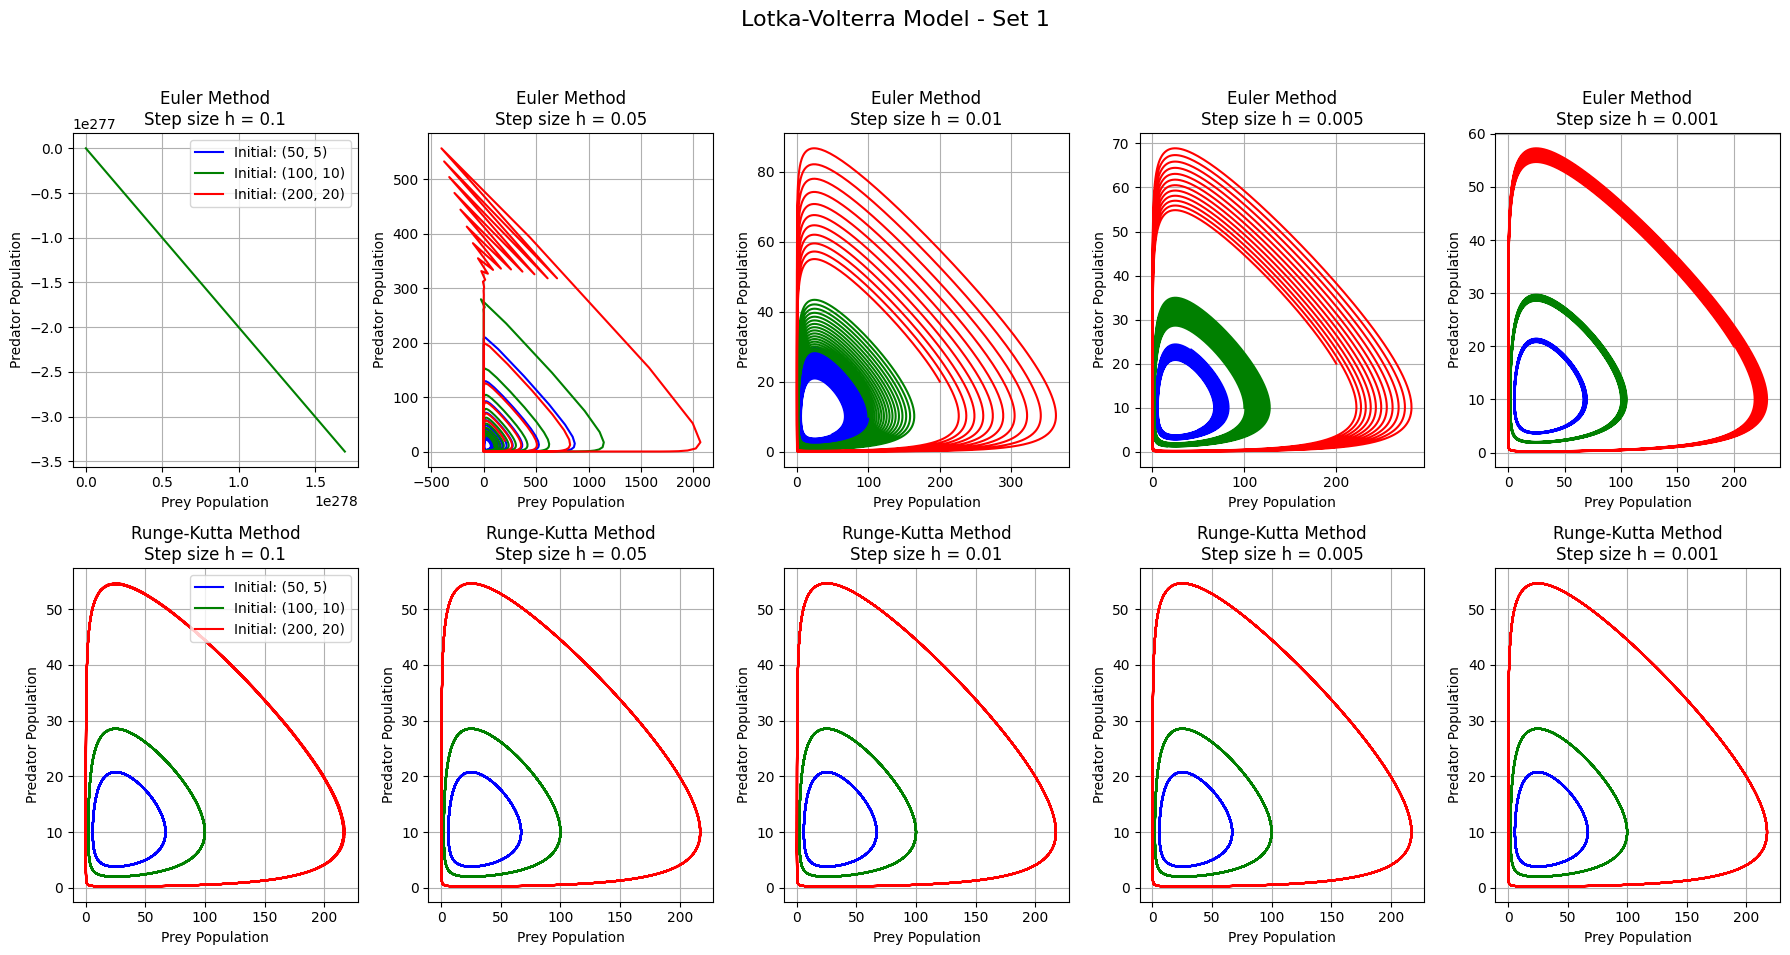

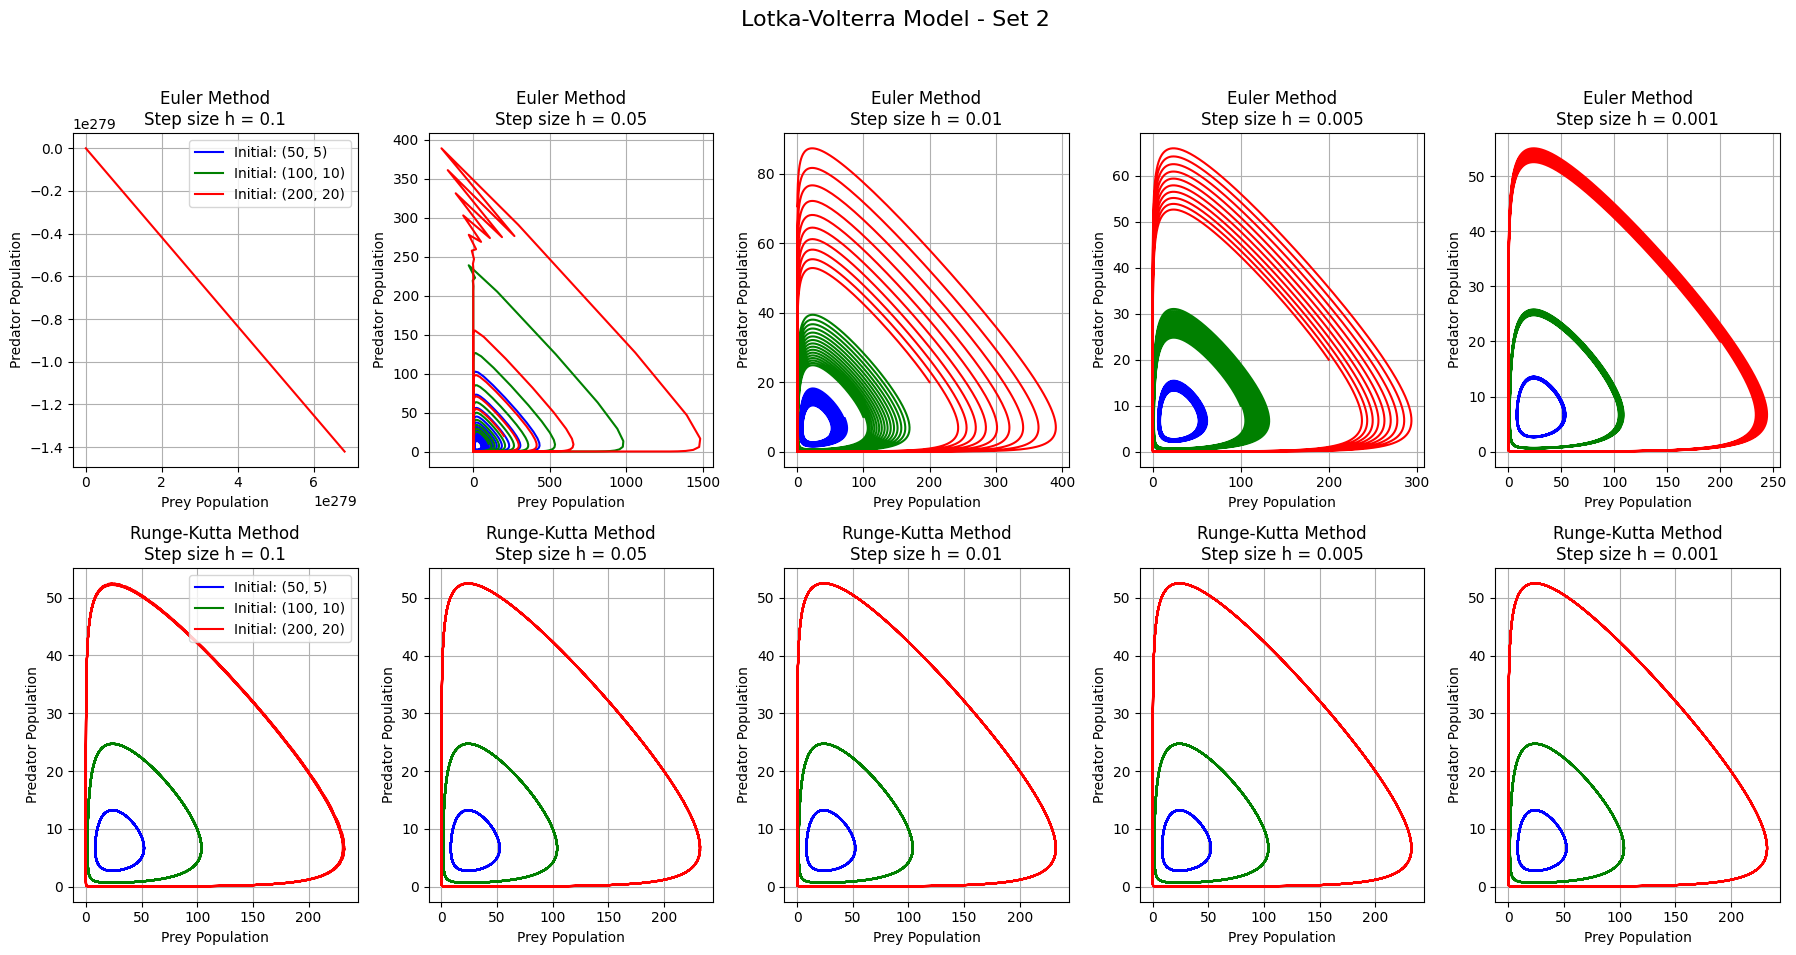

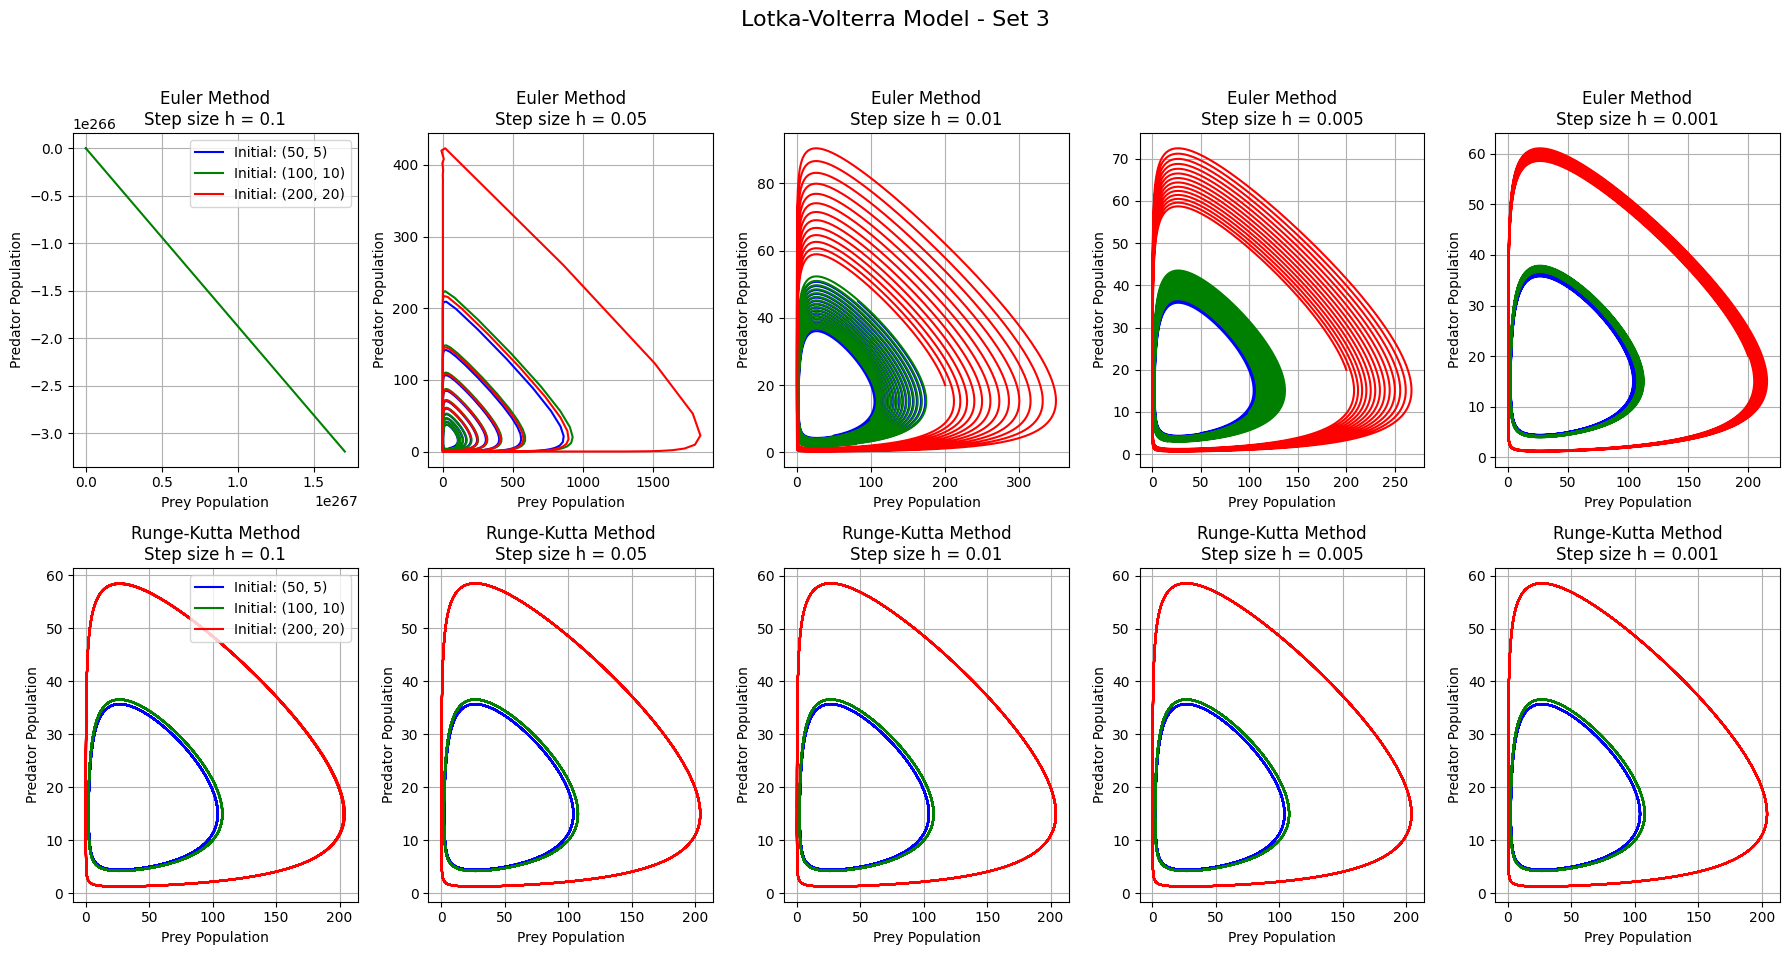

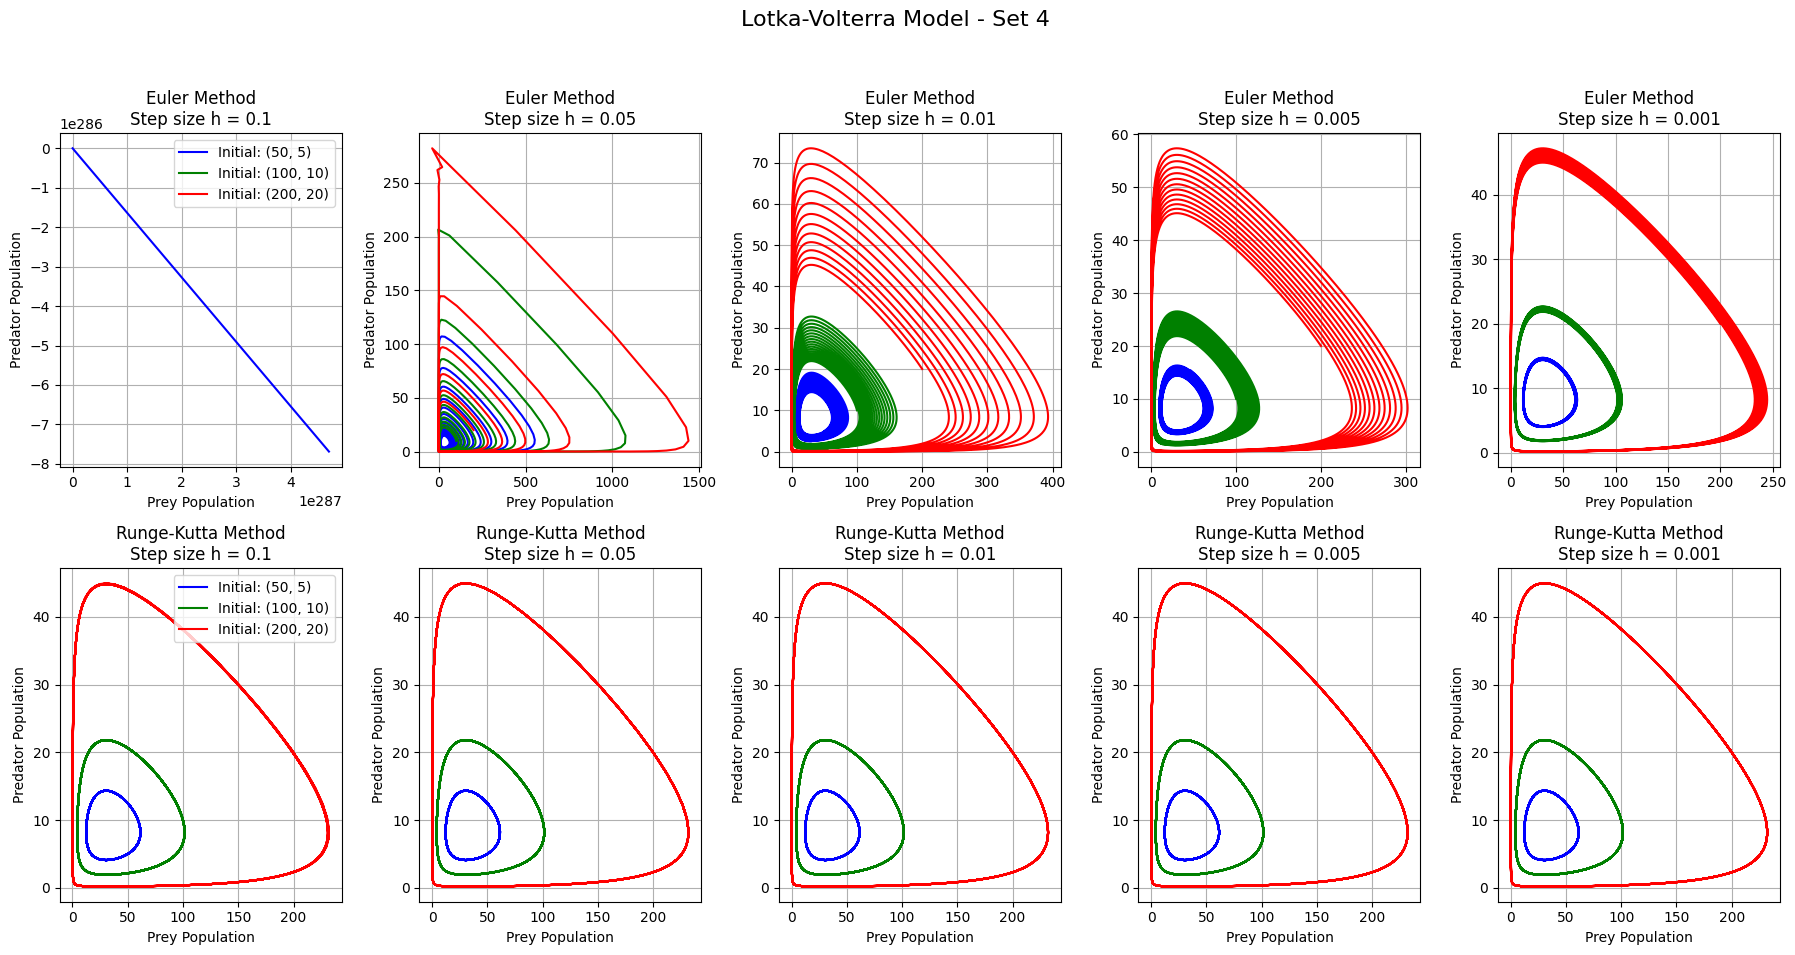

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters for Different Scenarios
params_set_1 = {
    'growth_rate': 1.0,        # Prey growth rate (k)
    'death_rate': 0.5,         # Predator death rate (l)
    'predation_coeff': 0.1,    # Predation coefficient (a)
    'reproduction_coeff': 0.02 # Predator reproduction coefficient (b)
}

params_set_2 = {
    'growth_rate': 0.8,
    'death_rate': 0.6,
    'predation_coeff': 0.12,
    'reproduction_coeff': 0.025
}

params_set_3 = {
    'growth_rate': 1.2,
    'death_rate': 0.4,
    'predation_coeff': 0.08,
    'reproduction_coeff': 0.015
}

params_set_4 = {
    'growth_rate': 0.9,
    'death_rate': 0.55,
    'predation_coeff': 0.11,
    'reproduction_coeff': 0.018
}

# Compile all parameter sets into a list for iteration
parameter_sets = [
    {'name': 'Set 1', 'params': params_set_1},
    {'name': 'Set 2', 'params': params_set_2},
    {'name': 'Set 3', 'params': params_set_3},
    {'name': 'Set 4', 'params': params_set_4}
]

# Lotka-Volterra Differential Equations
def prey_growth(prey, predator, params):
    """Compute the derivative of prey population."""
    return prey * (params['growth_rate'] - params['predation_coeff'] * predator)

def predator_growth(prey, predator, params):
    """Compute the derivative of predator population."""
    return -predator * (params['death_rate'] - params['reproduction_coeff'] * prey)

# Euler Integration Scheme
def euler_integrator(prey_init, predator_init, step_size, total_steps, params):
    """Solve the Lotka-Volterra equations using Euler's method."""
    prey = np.zeros(total_steps)
    predator = np.zeros(total_steps)
    prey[0], predator[0] = prey_init, predator_init
    
    for i in range(1, total_steps):
        prey[i] = prey[i-1] + step_size * prey_growth(prey[i-1], predator[i-1], params)
        predator[i] = predator[i-1] + step_size * predator_growth(prey[i-1], predator[i-1], params)
    
    return prey, predator

# Runge-Kutta 4th Order Integration Scheme
def runge_kutta4_integrator(prey_init, predator_init, step_size, total_steps, params):
    """Solve the Lotka-Volterra equations using the 4th Order Runge-Kutta method."""
    prey = np.zeros(total_steps)
    predator = np.zeros(total_steps)
    prey[0], predator[0] = prey_init, predator_init
    
    for i in range(1, total_steps):
        # Compute Runge-Kutta coefficients for prey
        k1_prey = step_size * prey_growth(prey[i-1], predator[i-1], params)
        k1_predator = step_size * predator_growth(prey[i-1], predator[i-1], params)
        
        k2_prey = step_size * prey_growth(prey[i-1] + 0.5 * k1_prey, predator[i-1] + 0.5 * k1_predator, params)
        k2_predator = step_size * predator_growth(prey[i-1] + 0.5 * k1_prey, predator[i-1] + 0.5 * k1_predator, params)
        
        k3_prey = step_size * prey_growth(prey[i-1] + 0.5 * k2_prey, predator[i-1] + 0.5 * k2_predator, params)
        k3_predator = step_size * predator_growth(prey[i-1] + 0.5 * k2_prey, predator[i-1] + 0.5 * k2_predator, params)
        
        k4_prey = step_size * prey_growth(prey[i-1] + k3_prey, predator[i-1] + k3_predator, params)
        k4_predator = step_size * predator_growth(prey[i-1] + k3_prey, predator[i-1] + k3_predator, params)
        
        # Update populations
        prey[i] = prey[i-1] + (k1_prey + 2*k2_prey + 2*k3_prey + k4_prey) / 6
        predator[i] = predator[i-1] + (k1_predator + 2*k2_predator + 2*k3_predator + k4_predator) / 6
    
    return prey, predator

# Simulation Settings
time_steps = [0.1, 0.05, 0.01, 0.005, 0.001]  # Different step sizes (h)
integration_methods = {
    'Euler': euler_integrator,
    'Runge-Kutta': runge_kutta4_integrator
}
initial_states = [ # Initial populations: (prey, predator)
    (50, 5),   
    (100, 10),
    (200, 20)
]
# Colors for Different Parameter Sets
colors = ['blue', 'green', 'red', 'purple']

# Plotting the Results for Each Parameter Set
for param_set in parameter_sets:
    set_name = param_set['name']
    params = param_set['params']
    
    plt.figure(figsize=(18, 10))
    
    for method_name, integrator in integration_methods.items():
        for idx, h in enumerate(time_steps):
            plt.subplot(len(integration_methods), len(time_steps), idx + 1 + list(integration_methods.keys()).index(method_name)*len(time_steps))
            for state_idx, (prey_init, predator_init) in enumerate(initial_states):
                total_steps = int(200 / h)  # Total simulation steps
                prey_pop, predator_pop = integrator(prey_init, predator_init, h, total_steps, params)
                plt.plot(prey_pop, predator_pop, label=f'Initial: ({prey_init}, {predator_init})', color=colors[state_idx])
            
            plt.title(f'{method_name} Method\nStep size h = {h}')
            plt.xlabel('Prey Population')
            plt.ylabel('Predator Population')
            if idx == 0:
                plt.legend()
            plt.grid(True)
    
    plt.suptitle(f'Lotka-Volterra Model - {set_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Results Analysis

#### Observations:

1. **Impact of Initial States**:
   - **Small Initial Populations** ($50, 5$): The dynamics stabilize into small periodic oscillations in all parameter sets, showing a smaller range of interaction between predator and prey.
   - **Medium Initial Populations** ($100, 10$): The populations exhibit larger oscillations, indicating higher interaction intensities before stabilizing into periodic orbits.
   - **Large Initial Populations** ($200, 20$): The system starts with high oscillatory behavior, with the predator population growing quickly due to the abundance of prey before stabilizing into large periodic orbits.

2. **Comparison Between Methods**:
   - **Euler's Method**:
     - Large errors are noticeable for larger step sizes ($h = 0.1, 0.05$), leading to erratic or diverging trajectories (e.g., unbounded growth in some plots).
     - For smaller step sizes ($h = 0.01$), the method converges to results closer to the Runge-Kutta method, but with visible inaccuracies.
   - **Runge-Kutta Method**:
     - Consistently stable across all step sizes, with smooth periodic orbits even for larger initial populations.
     - Clearly outperforms Euler's method in terms of numerical stability and accuracy.

3. **Effect of Parameter Sets**:
   - **Set 1**: Exhibits balanced dynamics with periodic oscillations stabilizing over time.
   - **Set 2**: Shows more apparent predator-prey interaction, with higher predation rates leading to sharper oscillations.
   - **Set 3**: Features a faster-growing prey population, resulting in extended orbits and delayed stabilization.
   - **Set 4**: Balanced parameters lead to moderate oscillations similar to Set 1, but with slightly reduced predator population peaks.

4. **Effect of Step Sizes**:
   - Larger step sizes ($h = 0.1, 0.05$) cause instability in Euler's method, particularly for large initial populations.
   - Smaller step sizes ($h = 0.01$) improve accuracy for Euler's method but still do not match the precision of the Runge-Kutta method.

#### Conclusions
- **Initial States Matter**: Larger populations amplify oscillations and interaction dynamics, while smaller populations stabilize quickly.
- **Runge-Kutta is More Stable**: It consistently outperforms Euler's method in stability and accuracy, especially for smaller step sizes.
- **Step Size Impacts Accuracy with Euler's Method**: Smaller step sizes improve results and are essential for Euler's method to avoid instability.
- **Parameter Sensitivity**: Different parameter sets significantly affect the interaction dynamics, showing the model's sensitivity to different assumptions.

# Homework 3-9: Simulating van der Pol equation

This task explores the van der Pol oscillator, a nonlinear system described by the second-order differential equation:
$$
\frac{d^2x}{dt^2} - \mu (1 - x^2) \frac{dx}{dt} + x = 0,
$$
where $\mu$ is a parameter that controls the nonlinearity and damping of the system.

The objective is to simulate and visualize the system’s trajectories in the phase plane (position $x$ versus velocity $\dot{x} = \frac{dx}{dt}$) for different values of $\mu$ and analyze the system’s behavior.

The implementation includes the following steps:
1. **Convert to a System of First-Order ODEs:**
  -	Rewrite the equation as, where $x$ represents the position and $y = \frac{dx}{dt}$ represents the velocity:
$$
\frac{dx}{dt} = y, \quad \frac{dy}{dt} = \mu (1 - x^2) y - x,
$$ 

2. **Solve the ODE System:**
	- Use the Runge-Kutta 4th-order (RK4) method to numerically integrate the system for various $\mu$ values.
	-	Initial conditions: $x(0) = 2.0$, $\dot{x}(0) = 0.0$.
3. **Phase Plane Visualization:**
	-	Plot trajectories in the phase plane ($x$ vs. $\dot{x}$) for different $\mu$ values.
	-	Overlay vector fields to illustrate the swirling motion and limit cycle behavior.
4. **Parameter Analysis:**
	-	Vary $\mu$ from $-1$ to $10$ to observe changes in the system’s dynamics:



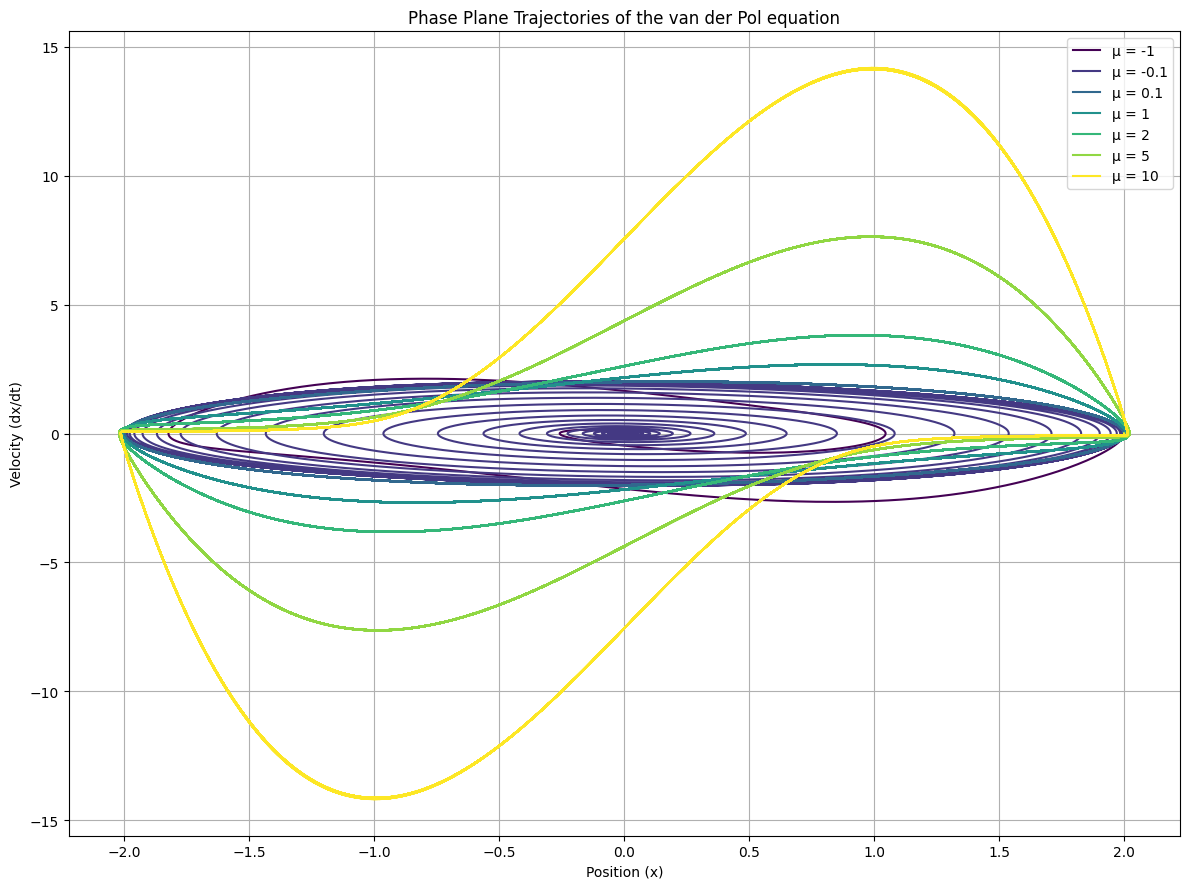

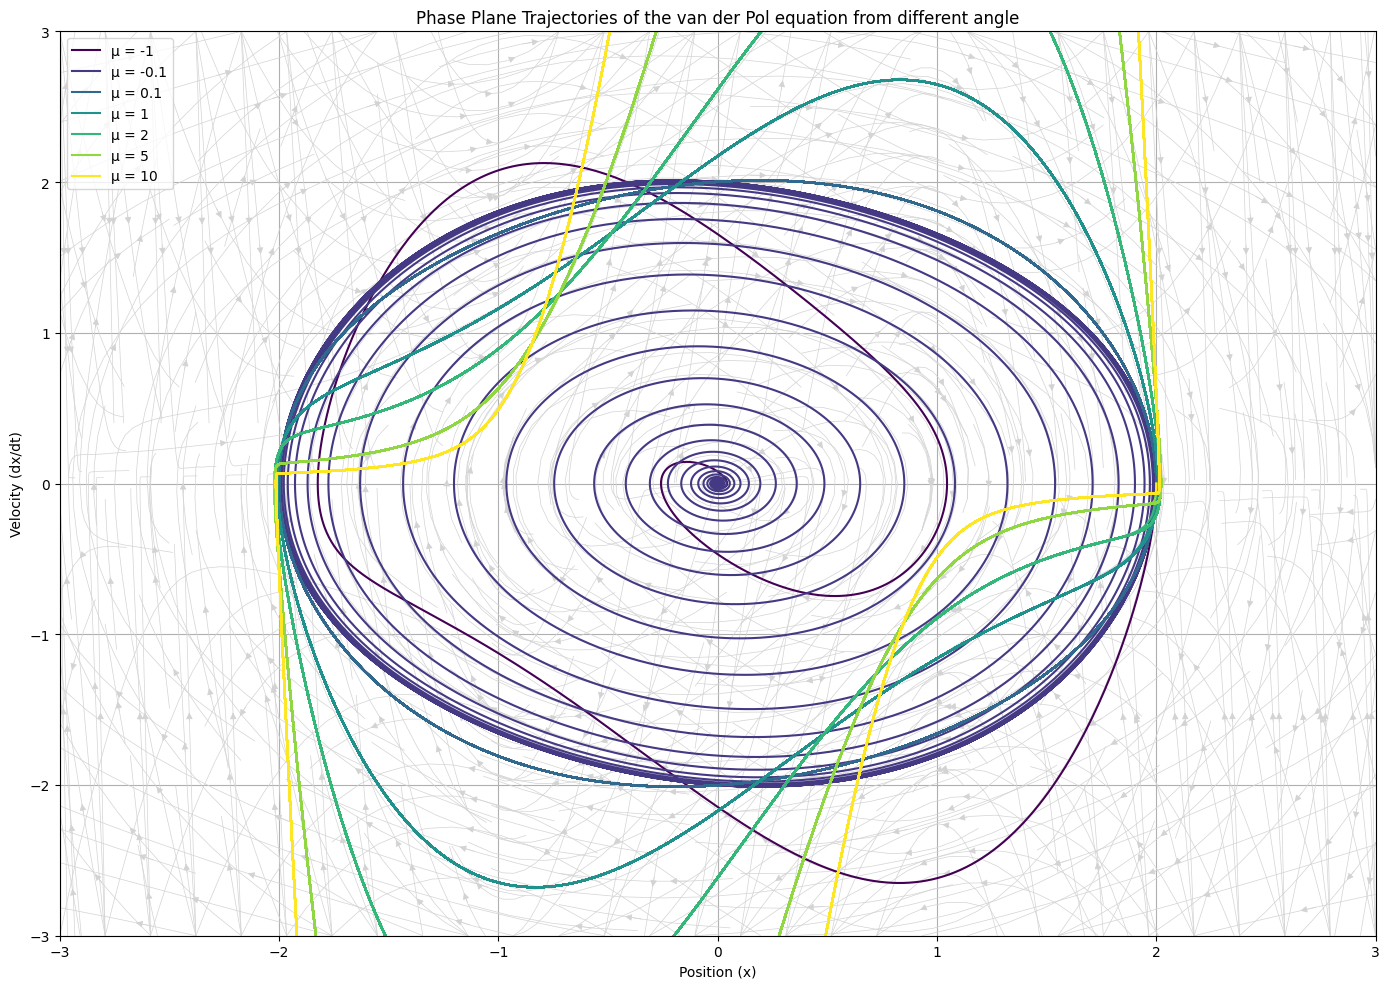

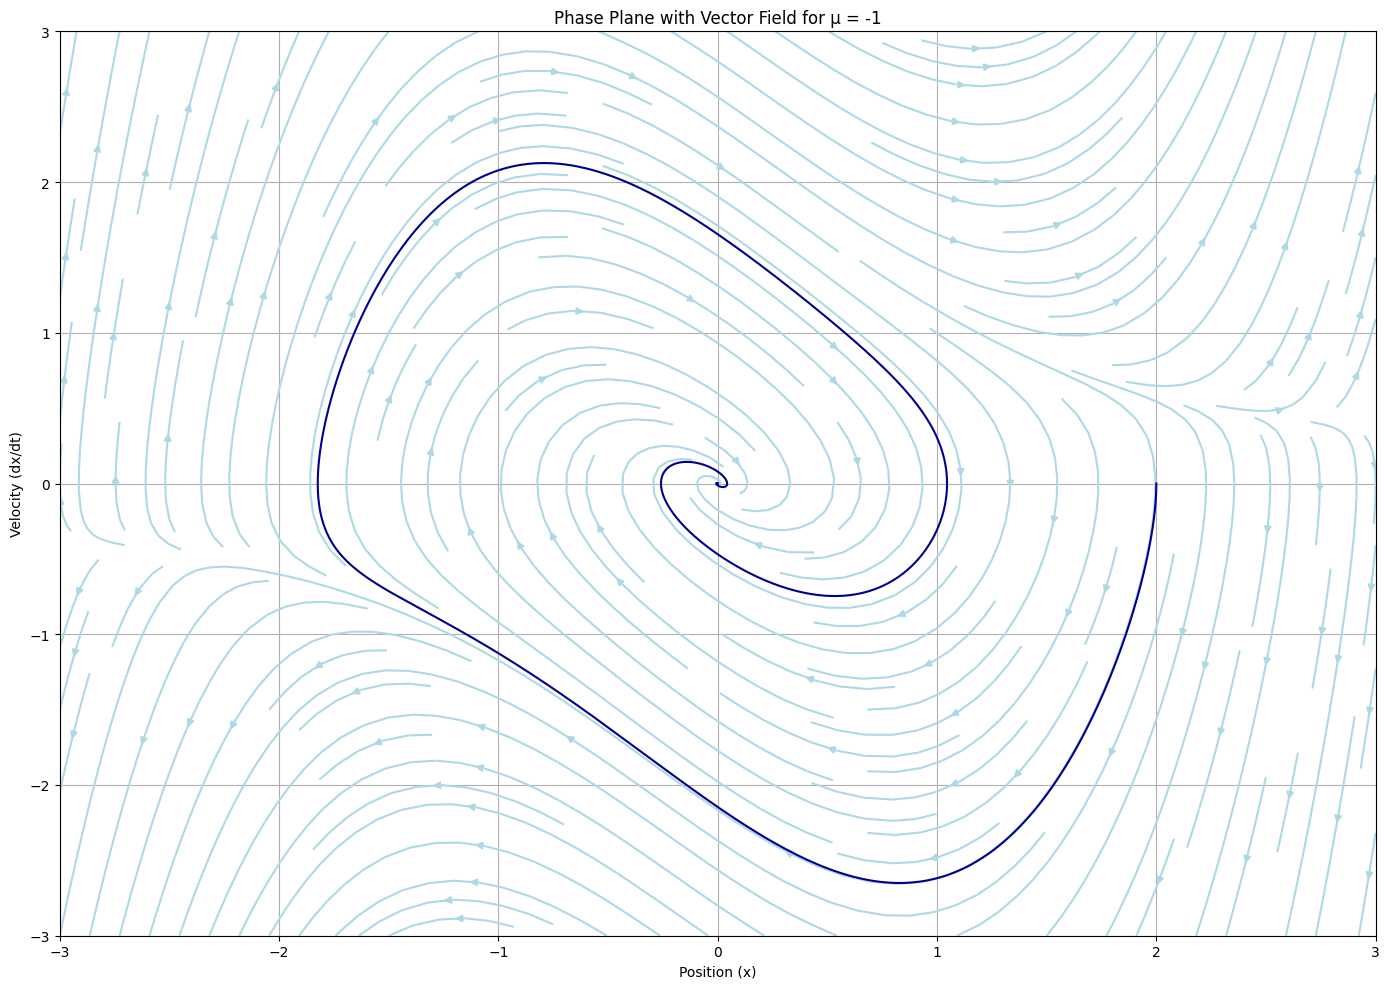

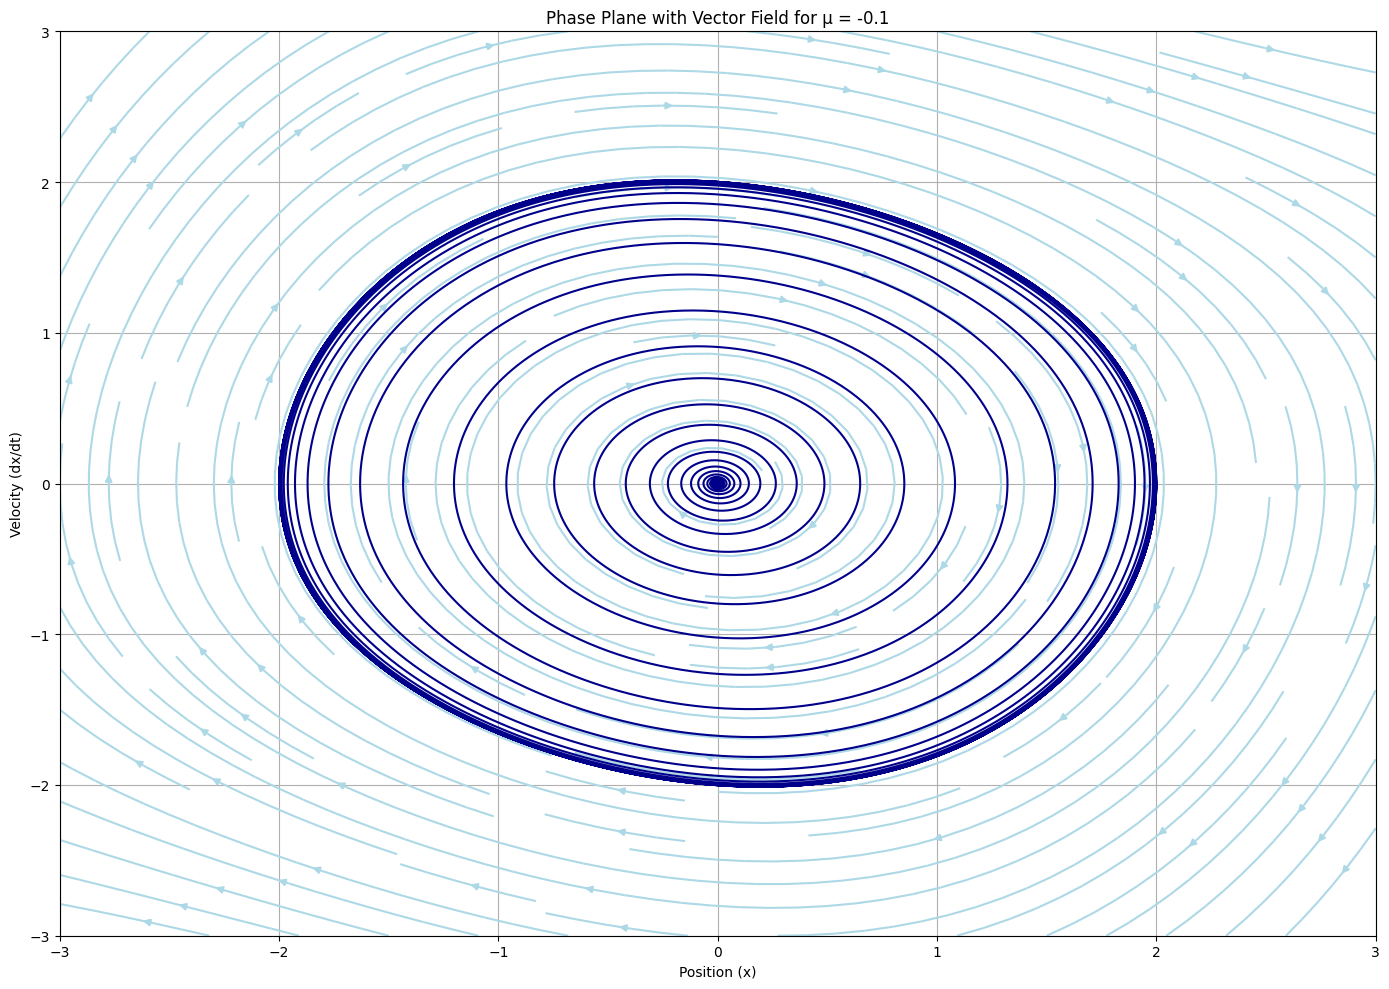

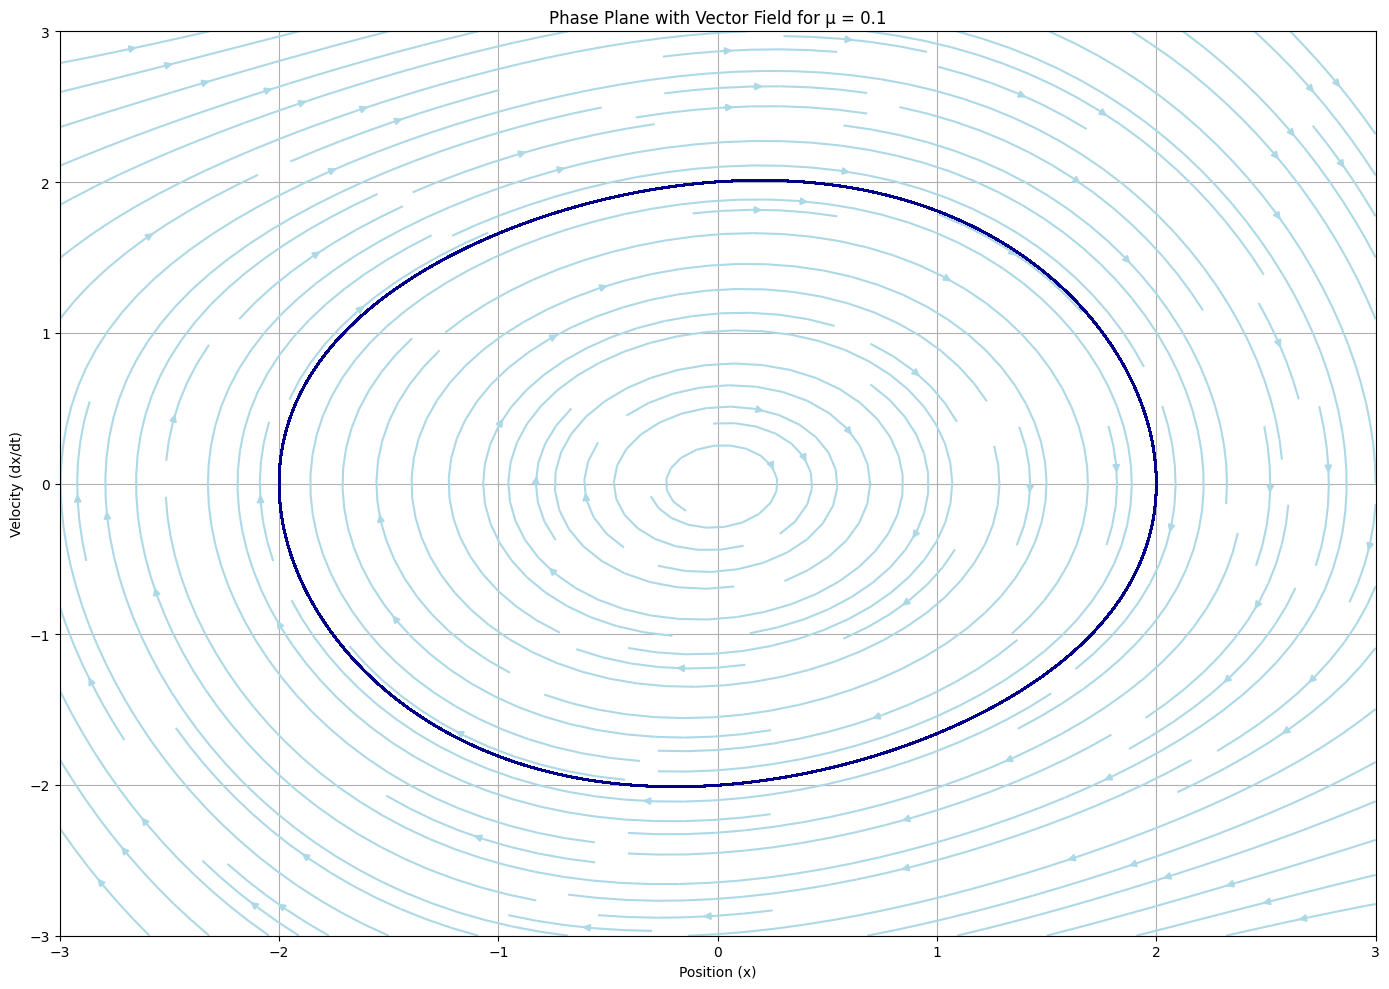

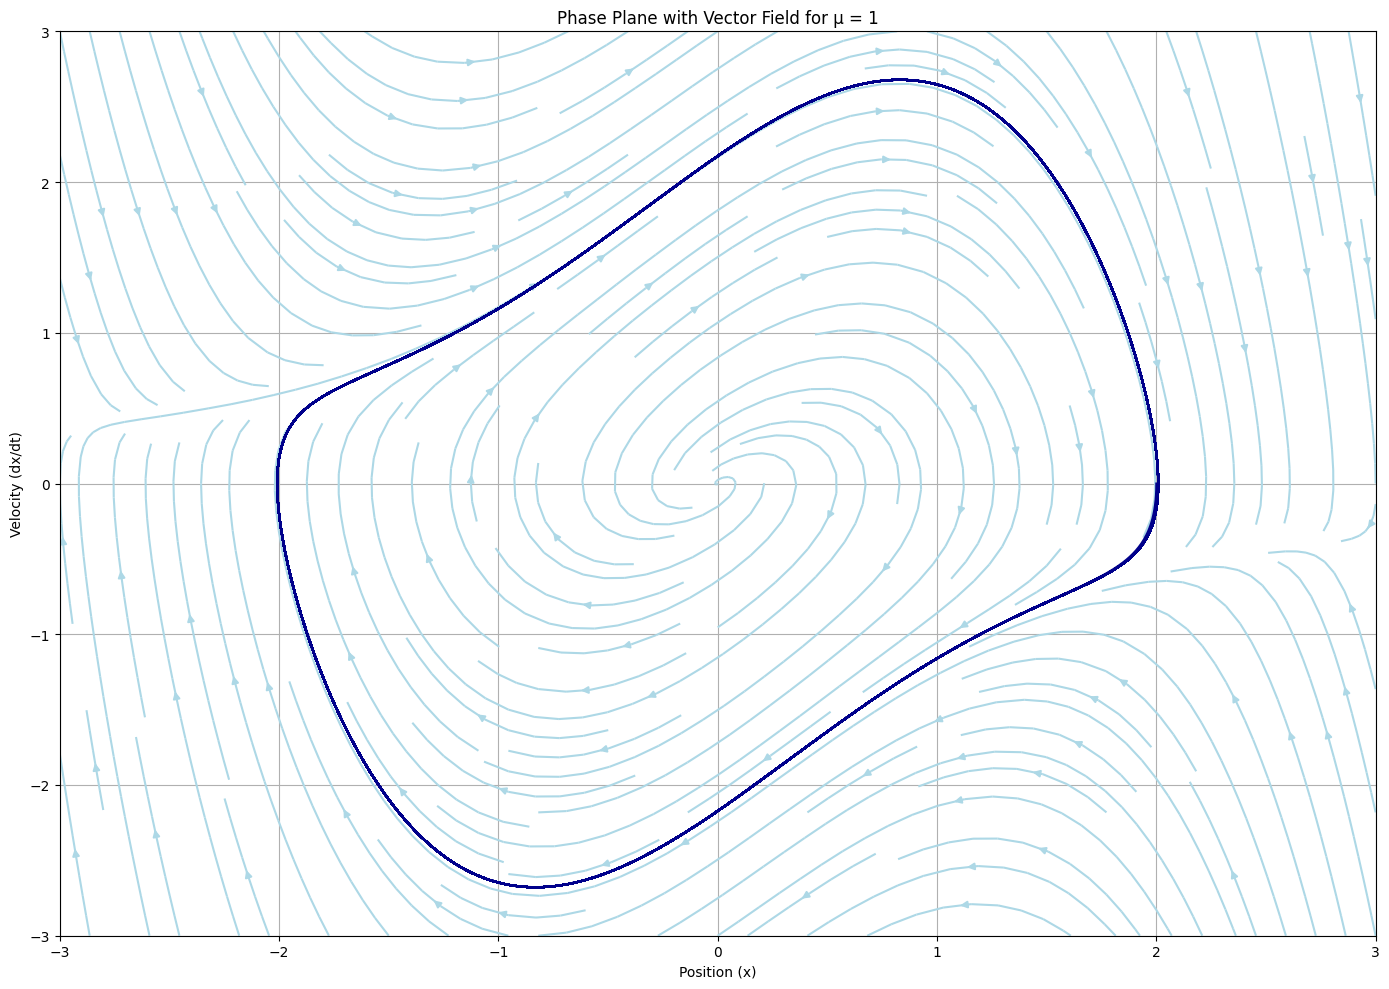

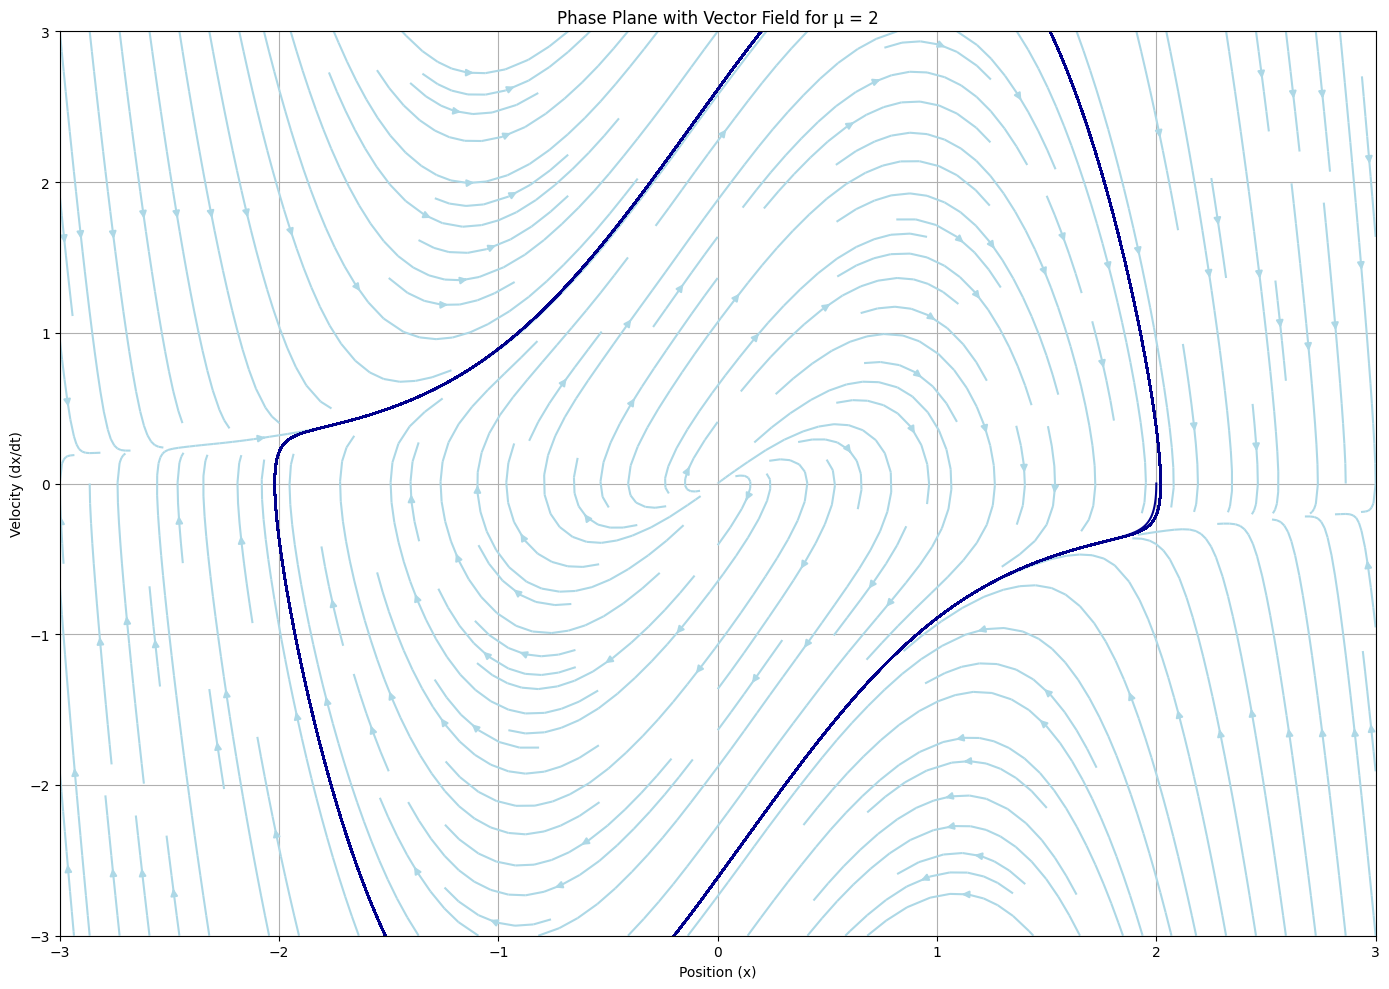

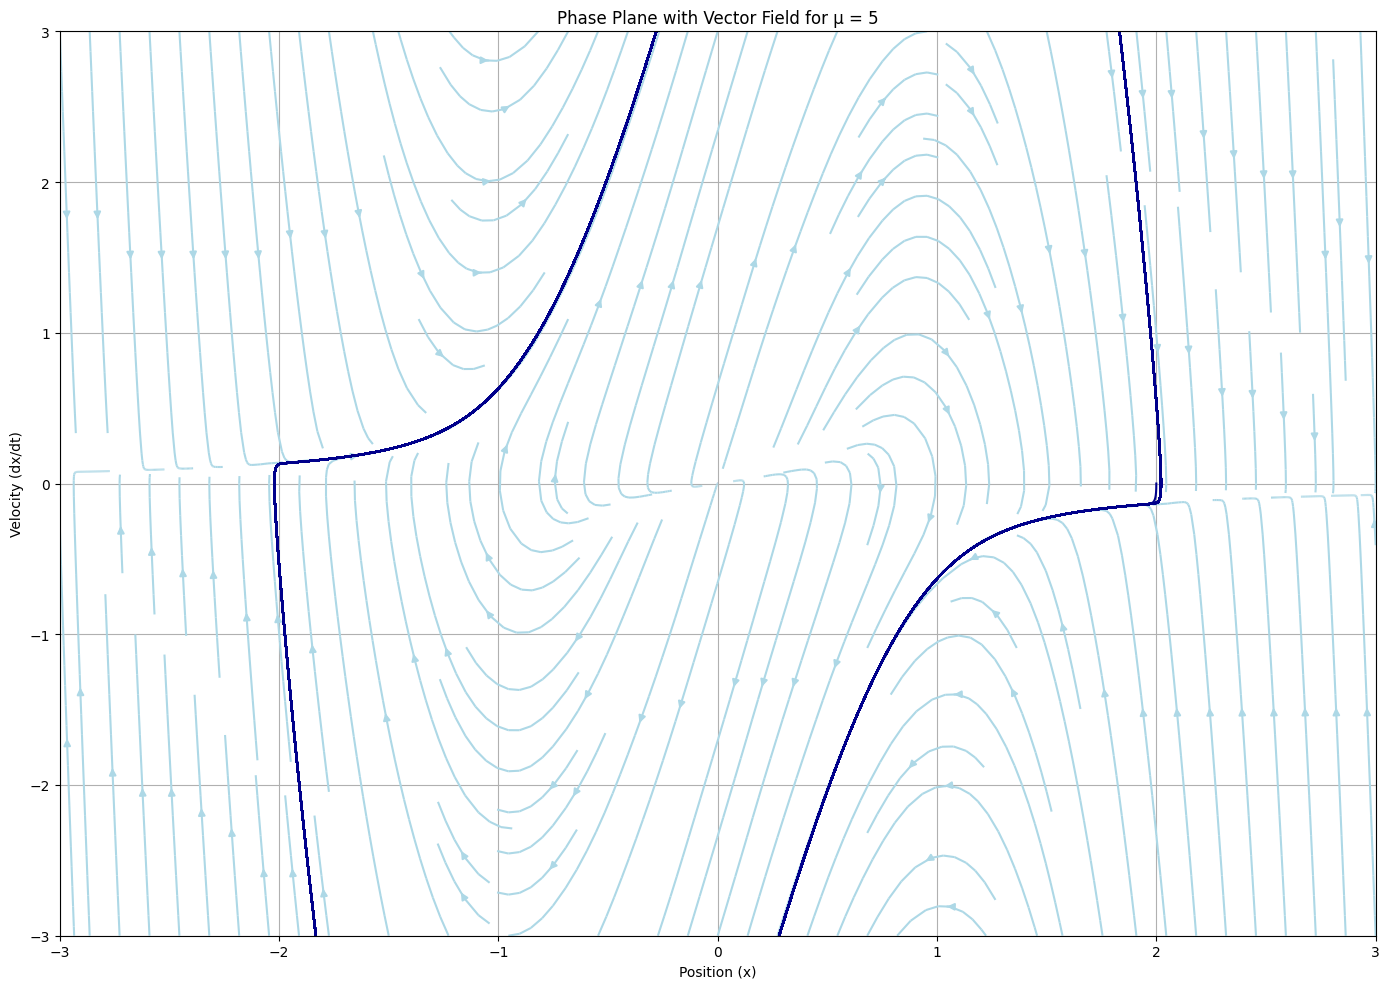

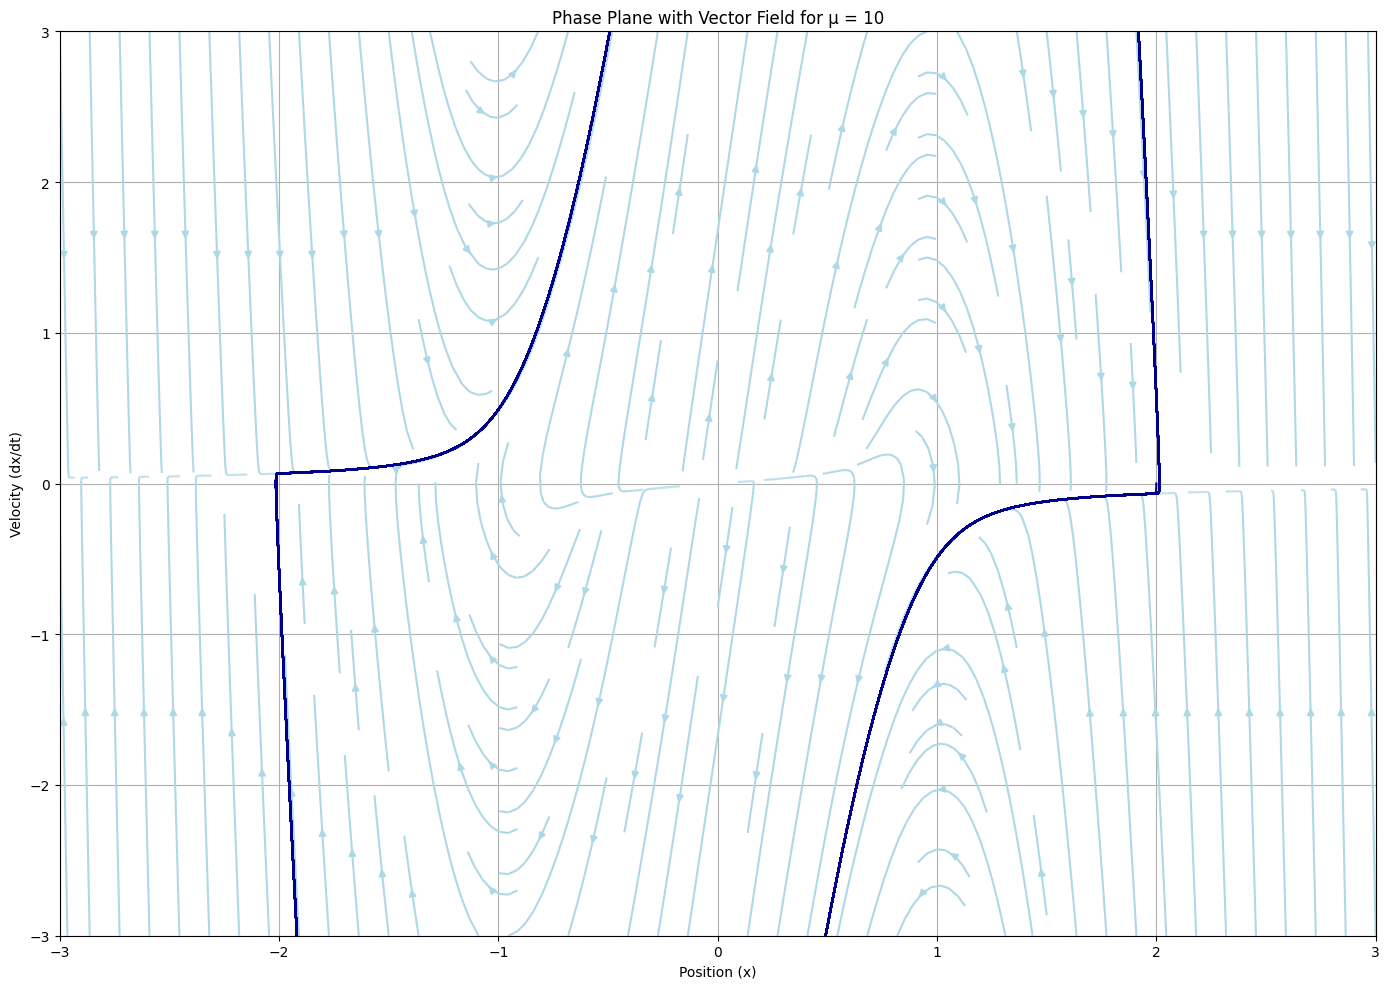

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def van_der_pol_system(state, mu):
    x, y = state
    dx_dt = y
    dy_dt = mu * (1 - x**2) * y - x
    return np.array([dx_dt, dy_dt])

def rk4_step(func, state, mu, dt):
    k1 = func(state, mu)
    k2 = func(state + 0.5 * dt * k1, mu)
    k3 = func(state + 0.5 * dt * k2, mu)
    k4 = func(state + dt * k3, mu)
    next_state = state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return next_state

def simulate_van_der_pol(mu, initial_state, t_max, dt):
    num_steps = int(t_max / dt)
    trajectory = np.zeros((num_steps, 2))
    state = np.array(initial_state)

    for i in range(num_steps):
        trajectory[i] = state
        state = rk4_step(van_der_pol_system, state, mu, dt)

    return trajectory

def plot_phase_planes(mu_values, initial_conditions, t_max=100, dt=0.01):
    plt.figure(figsize=(12, 9))
    colors = plt.cm.viridis(np.linspace(0, 1, len(mu_values)))

    for idx, mu in enumerate(mu_values):
        traj = simulate_van_der_pol(mu, initial_conditions, t_max, dt)
        x, y = traj[:, 0], traj[:, 1]
        plt.plot(x, y, label=f"μ = {mu}", color=colors[idx])

    plt.title("Phase Plane Trajectories of the van der Pol equation")
    plt.xlabel("Position (x)")
    plt.ylabel("Velocity (dx/dt)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_phase_planes_with_vector_field(mu_values, initial_conditions, t_max=100, dt=0.01):
    plt.figure(figsize=(14, 10))

    # Define grid for vector field
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 20),
                       np.linspace(y_min, y_max, 20))
    
    # Choose a representative mu for the vector field (e.g., mu=1)
    # Alternatively, you can create multiple vector fields for different mu
    # Here, we'll plot vector fields for each mu separately
    for idx, mu in enumerate(mu_values):
        U = Y
        V = mu * (1 - X**2) * Y - X
        # Normalize arrows for better visualization
        N = np.sqrt(U**2 + V**2)
        U_norm = U / N
        V_norm = V / N
        plt.streamplot(X, Y, U, V, color='lightgray', density=1.0, arrowsize=1, linewidth=0.5)
    
    # Define a color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(mu_values)))

    # Plot phase trajectories for each mu
    for idx, mu in enumerate(mu_values):
        traj = simulate_van_der_pol(mu, initial_conditions, t_max, dt)
        x, y = traj[:, 0], traj[:, 1]
        plt.plot(x, y, label=f"μ = {mu}", color=colors[idx])
    
    plt.title("Phase Plane Trajectories of the van der Pol equation from different angle")
    plt.xlabel("Position (x)")
    plt.ylabel("Velocity (dx/dt)")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Additionally, plot vector fields separately for each mu to visualize swirls
    for idx, mu in enumerate(mu_values):
        plt.figure(figsize=(14, 10))
        U = Y
        V = mu * (1 - X**2) * Y - X
        plt.streamplot(X, Y, U, V, color='lightblue', density=1.5, arrowsize=1)
        traj = simulate_van_der_pol(mu, initial_conditions, t_max, dt)
        x, y = traj[:, 0], traj[:, 1]
        plt.plot(x, y, color='darkblue')
        plt.title(f"Phase Plane with Vector Field for μ = {mu}")
        plt.xlabel("Position (x)")
        plt.ylabel("Velocity (dx/dt)")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Simulation parameters
mu_values = [-1, -0.1, 0.1, 1, 2, 5, 10]          # Different μ values
initial_state = [2.0, 0.0]                        # Initial conditions [x0, y0]
t_max = 1000                                       # Total simulation time
dt = 0.01                                         # Time step size

# Execute the simulation and plot
plot_phase_planes(mu_values, initial_state, t_max, dt)

# Different angle
plot_phase_planes_with_vector_field(mu_values, initial_state, t_max, dt)

## Analysis of the Results
Below is an analysis of the key findings:

---

#### **General Observations**
1. **Phase Plane Trajectories**:
   - Smaller $\mu$ values exhibit more symmetric and smooth trajectories.
   - For larger $\mu$ values, the system shows sharp transitions between slow and fast dynamics, indicative of strong nonlinearity.

2. **Vector Field**: For negative $\mu$, the trajectories spiral inward, indicating an attracting fixed point with reduced oscillatory behavior.

---

#### **Specific Parameter Analysis**
1. **$\mu = -1$**:
   - The trajectories spiral inward, and the system does not exhibit limit cycles. This indicates damping dominates, driving the system to a stable equilibrium point.
   - The vector field supports this observation, showing inward flow throughout the phase space.

2. **$\mu = -0.1$**:
   - Mild damping is observed, with trajectories still spiraling inward, albeit at a slower rate.
   - The system retains some oscillatory characteristics before stabilizing.

3. **$\mu = 0.1$**:
   - A transition to oscillatory behavior begins. Trajectories indicate the presence of a nascent limit cycle, although damping effects are still noticeable.

4. **$\mu = 1$**:
   - A clear, stable limit cycle emerges. The system displays balanced nonlinear oscillations.

5. **$\mu = 2$**:
   - The limit cycle becomes more pronounced, with increased sharpness in transitions between the slow and fast dynamics.
   - The trajectories reveal stronger nonlinearity, consistent with the higher $\mu$ value.

6. **$\mu = 5$ and $\mu = 10$**:
   - The system exhibits very steep transitions, dominated by the nonlinear damping term.
   - The vector field highlights the significant difference in speed during different phases of the oscillation, with near-vertical and near-horizontal flows in the phase space.

---

#### Conclusion:
1. **Genera Overview of the Nonlinear Dynamics**:
   - The nonlinearity in the van der Pol oscillator becomes evident as $\mu$ increases, with sharper transitions in the phase plane indicating stronger nonlinear damping.
   - For large $\mu$, the system operates in two distinct phases: slow recovery and fast release.

2. **Effect of $\mu$ on Stability**:
   - Positive $\mu$ values lead to stable oscillatory limit cycles, with increasing $\mu$ amplifying nonlinearity.
   - Negative $\mu$ values result in damping-dominated behavior, where trajectories converge to a stable fixed point without oscillations.

3. **Limit Cycle Behavior**:
   - The formation and stabilization of limit cycles are controlled by the value of $\mu$. These cycles represent stable oscillatory behavior where the system resists perturbations.


## HW 7-8: Simulating the Lorenz system

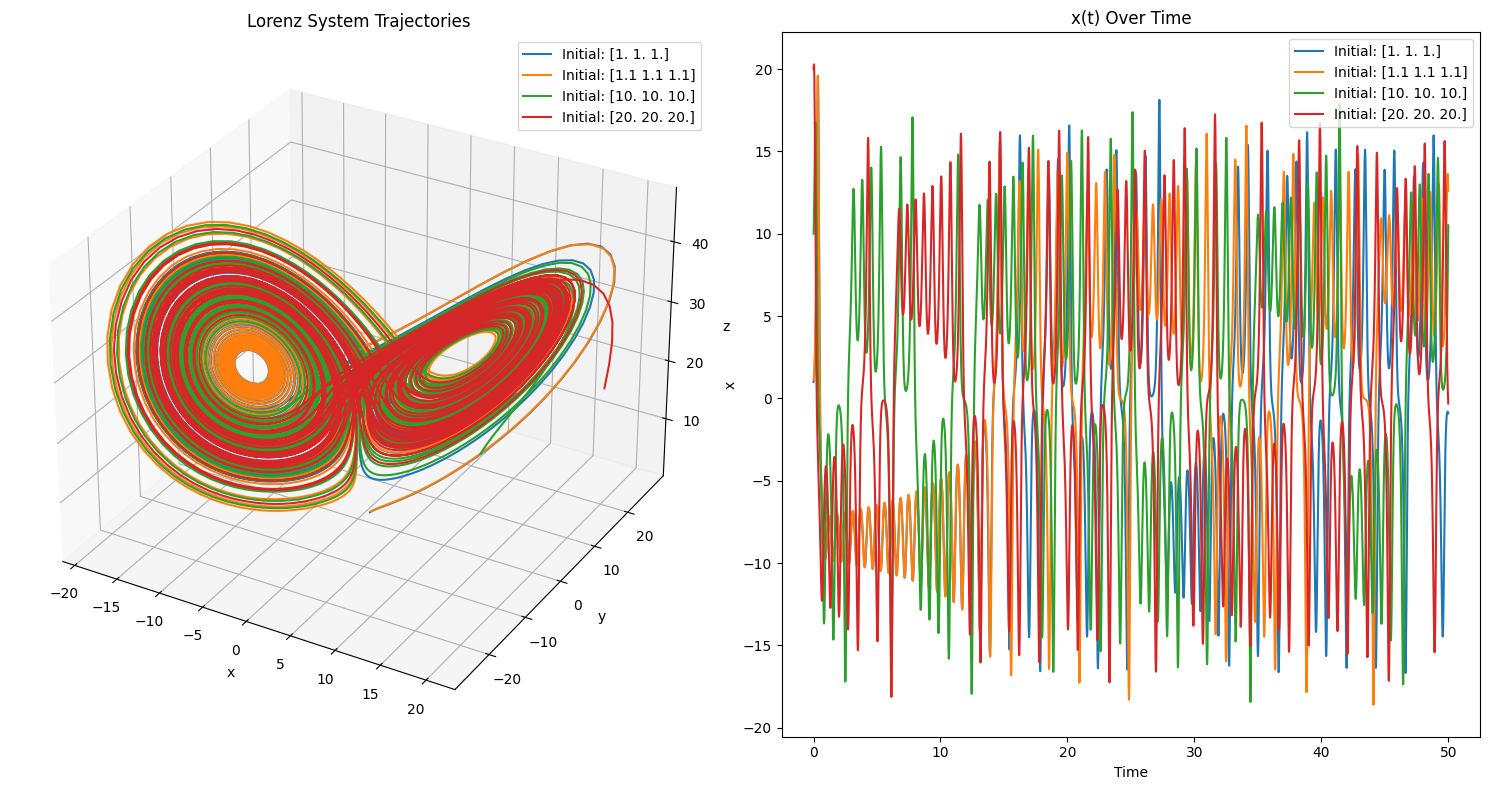

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
beta = 8 / 3
rho = 28

# Time settings
t_span = (0, 50)  # Time interval
t_eval = np.linspace(*t_span, 5000)  # Time points for evaluation

# Initial conditions
initial_conditions = [
    [1, 1, 1],         # Small values
    [1.1, 1.1, 1.1],   # Slightly perturbed
    [10, 10, 10],      # Moderate values
    [20, 20, 20],      # Larger values
]

# Solve the system for each initial condition
trajectories = []
for initial in initial_conditions:
    solution = solve_ivp(
        lorenz_system, t_span, initial, args=(sigma, rho, beta), t_eval=t_eval, method='RK45'
    )
    trajectories.append(solution)

# Plot 3D trajectories
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
for sol in trajectories:
    x, y, z = sol.y
    ax.plot(x, y, z, label=f"Initial: {sol.y[:, 0]}")
ax.set_title("Lorenz System Trajectories")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

# Plot x(t) over time
plt.subplot(122)
for sol in trajectories:
    plt.plot(sol.t, sol.y[0], label=f"Initial: {sol.y[:, 0]}")
plt.title("x(t) Over Time")
plt.xlabel("Time")
plt.ylabel("x")
plt.legend()

plt.tight_layout()
plt.show()